In [1]:
import os, time, random
import numpy as np
import pandas as pd
import shutil as sh
import cv2

from IPython.display import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# pre-processing

img_h, img_w, num_channels = (380, 676, 3)

df = pd.read_csv('./car_detection_dataset/labels.csv')
df['image_id'] = df['image_id'].apply(lambda x: x.split('.')[0])
df['class_id'] = 0

# get x,y,w,h of the bouding boxes
df['x'] = (df['xmin'] + df['xmax'])/2
df['y'] = (df['ymin'] + df['ymax'])/2
df['w'] = df['xmax'] - df['xmin']
df['h'] = df['ymax'] - df['ymin']
# normalize
df['x'] = df['x']/img_w
df['y'] = df['y']/img_h
df['w'] = df['w']/img_w
df['h'] = df['h']/img_h
df.head()

,image_id,xmin,ymin,xmax,ymax,class_id,x,y,w,h
0,vid_4_1000,281.259045,187.035071,327.727931,223.225547,0,0.450434,0.539817,0.068741,0.095238
1,vid_4_10000,15.163531,187.035071,120.329957,236.430180,0,0.100217,0.557191,0.155572,0.129987
2,vid_4_10040,239.192475,176.764801,361.968162,236.430180,0,0.444645,0.543678,0.181621,0.157014
3,vid_4_10020,496.483358,172.363256,630.020260,231.539575,0,0.833213,0.531451,0.197540,0.155727
4,vid_4_10060,16.630970,186.546010,132.558611,238.386422,0,0.110347,0.559122,0.171491,0.136422


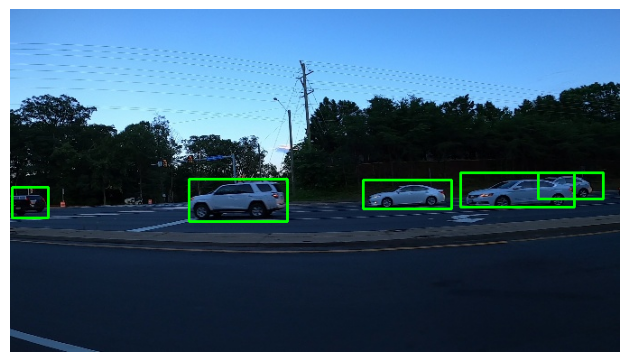

In [20]:
ORIGINAL_IMAGES_PATH = f'./car_detection_dataset/images/'

def show_bbox(df, image):

    df_image = df.loc[df['image_id'] == image]
    #print(df_image)

    image_to_show = cv2.imread(ORIGINAL_IMAGES_PATH + f'{image}.jpg')

    for i in df_image.index:
        x = float(df_image.loc[i, 'x'])
        y = float(df_image.loc[i, 'y'])
        w = float(df_image.loc[i, 'w'])
        h = float(df_image.loc[i, 'h'])
        # print(x,y,w,h)

        x1 = int( (x - w/2) * img_w )
        y1 = int( (y - h/2) * img_h )
        x2 = int( (x + w/2) * img_w )
        y2 = int( (y + h/2) * img_h )

        cv2.rectangle(image_to_show, (x1, y1), (x2, y2), (0,255,0), 2)
    
    img_rgb = cv2.cvtColor(image_to_show, cv2.COLOR_BGR2RGB)
    plt.axis('off')
    plt.tight_layout()
    plt.imshow(img_rgb)
    plt.show()

show_bbox(df, 'vid_4_26420')

In [6]:
!python ./yolov5/detect.py --weights ./yolov5/yolov5s.pt --img 640 --source ./car_detection_dataset/images/vid_4_26420.jpg

detect: weights=['./yolov5/yolov5s.pt'], source=./car_detection_dataset/images/vid_4_26420.jpg, data=yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 2023-4-6 Python-3.9.16 torch-2.0.0+cu117 CUDA:0 (NVIDIA GeForce RTX 3080, 9987MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
image 1/1 /home/jb/CSC2503-project/car_detection_dataset/images/vid_4_26420.jpg: 384x640 5 cars, 32.8ms
Speed: 0.8ms pre-process, 32.8ms inference, 87.5ms NMS per image at shape (1, 3, 640, 640)
Results saved to yolov5/runs/detect/exp


In [11]:
!python ./yolov5/detect.py --weights ./best.pt --img 640 --source ./car_detection_dataset/images/vid_4_26420.jpg

detect: weights=['./best.pt'], source=./car_detection_dataset/images/vid_4_26420.jpg, data=yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 2023-4-6 Python-3.9.16 torch-2.0.0+cu117 CUDA:0 (NVIDIA GeForce RTX 3080, 9987MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /home/jb/CSC2503-project/car_detection_dataset/images/vid_4_26420.jpg: 384x640 5 cars, 28.4ms
Speed: 0.2ms pre-process, 28.4ms inference, 0.6ms NMS per image at shape (1, 3, 640, 640)
Results saved to yolov5/runs/detect/exp


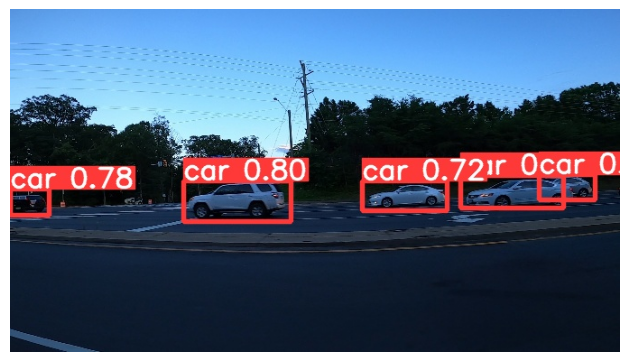

In [18]:
img = cv2.imread('./yolov5/runs/detect/exp/vid_4_26420.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.tight_layout()
plt.imshow(img_rgb)
plt.show()

In [19]:
os.system(f'rm -rf ./yolov5/runs/detect/*')

0